# Naive Bayes - Class Exercise 3

## Introduction

## Metadata (Data Dictionary)

| No.| Variable | Data Type | Description |
|----|----------|-----------|-------------|
| 1  | fixed acidity | float | Fixed acidity measured |
| 2  | volatile acidity | float | Volatile acidity measured|
| 3  | citric acid | float | Amount of citric acid |
| 4  | residual sugar | float | Amount of residual sugar |
| 5  | chlorides | float | Amount of chlorides |
| 6  | free sulfur dioxide | float | Amount of free sulfur dioxide |
| 7  | total sulfur dioxide | float | Amount of total sulfur dioxide |
| 8  | density | float | Density measured |
| 9  | pH | float | pH value measured |
| 10 | sulphates | float | Amount of sulphates |
| 11 | alcohol | float | Amount of alcohol |
| 12 | Type | string | Type of Wine (R: Red, W: White) |


## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics

## Import Data

<font color=red><b>Action</b>: Load the data file and check against the metadata.

In [2]:
df = pd.read_csv('Wine.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type
0,8.1,0.46,0.31,1.7,0.052,50.0,183.0,0.99230,3.03,0.42,11.2,R
1,5.2,0.28,0.29,1.1,0.028,18.0,69.0,0.99168,3.24,0.54,10.0,W
2,6.2,0.19,0.38,5.1,0.019,22.0,82.0,0.98961,3.05,0.36,12.5,W
3,10.6,0.83,0.37,2.6,0.086,26.0,70.0,0.99810,3.16,0.52,9.9,R
4,6.8,0.46,0.26,2.7,0.042,28.0,83.0,0.99114,3.38,0.51,12.0,W
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,8.1,0.45,0.34,8.3,0.037,33.0,216.0,0.99760,3.31,0.64,9.7,W
6493,8.9,0.50,0.21,2.2,0.088,21.0,39.0,0.99692,3.33,0.83,11.1,R
6494,6.9,0.28,0.27,2.1,0.036,42.0,121.0,0.99260,3.42,0.49,10.8,W
6495,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,R


In [3]:
df['Type'] = df['Type'].map({'R': 0, 'W': 1})

In [4]:
labels = df['Type'].unique()
labels

array([0, 1], dtype=int64)

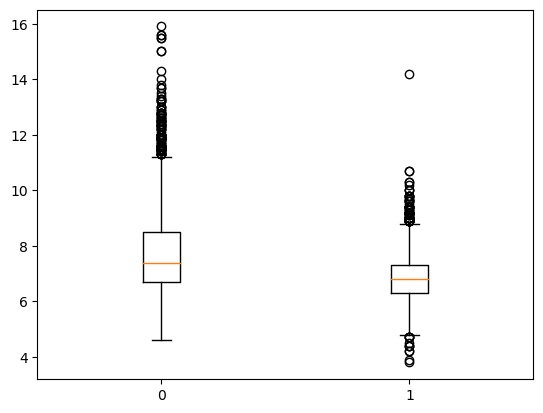

In [5]:
feature = 'fixed acidity'
y = [df[feature][df['Type'] == label] for label in labels]

plt.boxplot(y, labels=labels)
plt.show()

In [6]:
label = 'Type'
features = [feature for feature in list(df) if feature != label]
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

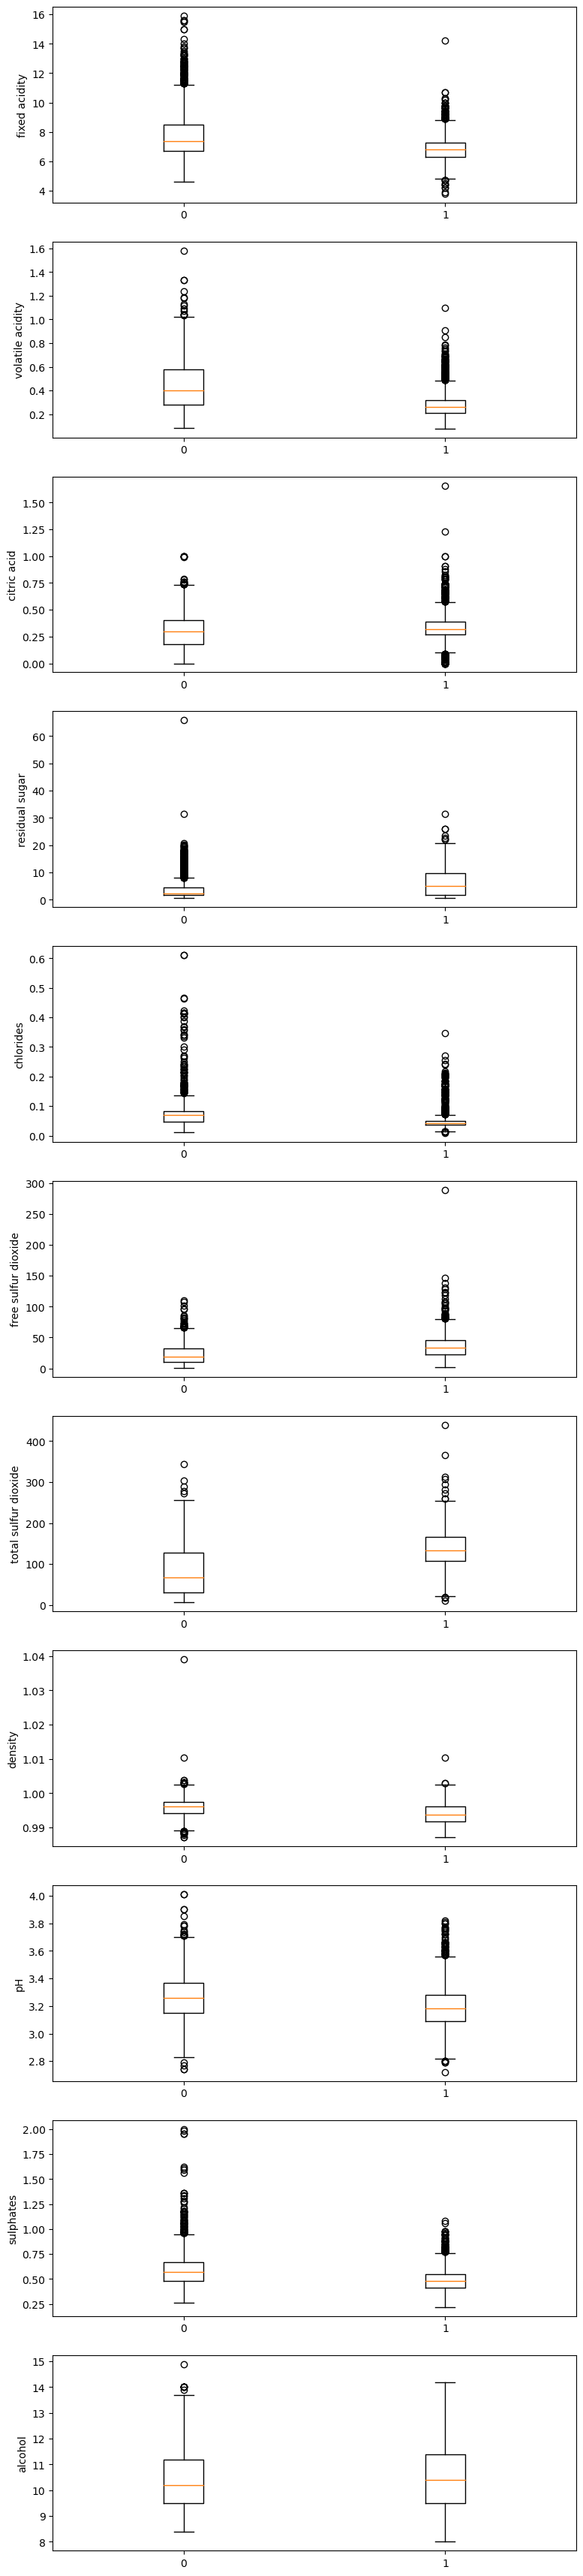

In [7]:
n_features = len(features)

fig, ax = plt.subplots(n_features, 1, figsize=(9, 4*n_features))

for i in range(n_features):
    feature = features[i]
    y = [df[feature][df['Type'] == label] for label in labels]
    ax[i].boxplot(y, labels=labels)
    ax[i].set_ylabel(feature)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)
display(train_df.head())
display(test_df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type
5372,6.7,0.22,0.22,1.2,0.038,5.0,124.0,0.99098,3.10,0.37,11.2,1
1790,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0
5879,8.0,0.61,0.38,12.1,0.301,24.0,220.0,0.99930,2.94,0.48,9.2,0
1065,6.0,0.33,0.27,0.8,0.185,12.0,188.0,0.99240,3.12,0.62,9.4,1
852,7.1,0.33,0.18,6.3,0.094,27.0,166.0,0.99474,2.90,0.49,9.5,1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type
5316,6.4,0.180,0.35,1.0,0.045,39.0,108.0,0.99110,3.31,0.35,10.900000,1
5210,7.1,0.230,0.23,3.5,0.038,23.0,112.0,0.99157,3.05,0.37,11.366667,1
3518,7.6,0.270,0.32,1.2,0.043,23.0,72.0,0.99236,3.06,0.68,10.500000,1
1622,5.7,0.200,0.24,13.8,0.047,44.0,112.0,0.99837,2.97,0.66,8.800000,1
2443,8.1,0.725,0.22,2.2,0.072,11.0,41.0,0.99670,3.36,0.55,9.100000,0


In [10]:
train_x = train_df[features]
train_y = train_df[label]

test_x = test_df[features]
test_y = test_df[label]

In [11]:
df_x = df[features]
df_y = df[label]

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
gnb = GaussianNB()

In [14]:
gnb.fit(train_x, train_y)
test_yhat = gnb.predict(test_x)

In [15]:
metrics.confusion_matrix(test_y, test_yhat)

array([[337, 193],
       [ 55, 715]], dtype=int64)

In [16]:
def get_classification_metrics(y, yhat):
    # Record the total number of samples
    n = len(y)
    
    # Count the number of correct samples and calculate the accuracy
    n_correct = (y == yhat).sum()
    accuracy = n_correct / n
    
    # One way to calculate the error rate
    error_rate = 1 - accuracy
    
    # The other way to calculate the error rate
    n_incorrect = (y != yhat).sum()
    error_rate = n_incorrect / n
    
    # Count the number of true positive
    TP = ((y == 1) & (yhat == 1)).sum()
    
    # Count the number of false positive
    FP = ((y == 0) & (yhat == 1)).sum()
    
    # Count the number of true negative
    TN = ((y == 0) & (yhat == 0)).sum()
    
    # Count the number of false negative
    FN = ((y == 1) & (yhat == 0)).sum()
    
    # Calculate sensitivity / specificity / precision / recall
    sensitivity = recall = TP / (TP + FN)
    specificity = TN / (FP + TN)
    precision = TP / (TP + FP)
    
    item = ['Accuracy', 'Error Rate', 'Sensitivity', 'Specificity', 'Precision', 'Recall']
    value = accuracy, error_rate, sensitivity, specificity, precision, recall
    
    df_out = {'Item': item, 'Value': value}
    df_out = pd.DataFrame(df_out)
    return df_out

In [17]:
get_classification_metrics(test_y, test_yhat)

,Item,Value
0,Accuracy,0.809231
1,Error Rate,0.190769
2,Sensitivity,0.928571
3,Specificity,0.635849
4,Precision,0.787445
5,Recall,0.928571
